In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pwd
!ls

/content
drive  sample_data


In [3]:
import os
os.chdir("/content/drive/MyDrive/proyecto2/TIFF4")
!ls

In [4]:
from PIL import Image
import urllib.request

import ee # Google Earth Engine
from os import system

In [5]:
 import ee
 ee.Authenticate()
 ee.Initialize(project='ee-santiagobautista2346')

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [6]:
%pwd

'/content/drive/MyDrive/proyecto2/TIFF4'

In [7]:
import urllib.request
from PIL import Image
import ee

# Inicializamos la API de Earth Engine (si no está inicializada)
ee.Initialize()

def sentinel2(start_date, end_date, geometry, imageVisParam):
    IMGSentinel = ee.ImageCollection('COPERNICUS/S2_SR') \
                  .filterDate(start_date, end_date) \
                  .filterBounds(geometry) \
                  .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'Less_Than', 30)
    print("size: ", IMGSentinel.size().getInfo())

    collectionList = IMGSentinel.toList(IMGSentinel.size())
    collectionSize = collectionList.size().getInfo()

    imgs = []
    fechas = []
    for i in range(collectionSize):
        SentinelFiltro = ee.Image(collectionList.get(i))
        SentinelClip = SentinelFiltro.clip(geometry)

        # Extraemos las bandas sin visualización, simplemente como imagen multibanda
        imagen = SentinelClip.select([ "B2", "B3","B4", "B5", "B6", "B7", "B8"])

        # Obtener la URL de la imagen para descargarla
        url = imagen.getDownloadURL({
            'scale': 10,  # Resolución espacial más alta (10 metros por píxel)
            'region': geometry,  # Región de interés
            'format': 'GeoTIFF',  # Formato de archivo GeoTIFF
            'crs': 'EPSG:4326',  # Sistema de coordenadas geográficas
            'maxPixels': 1e8  # Aumentar el límite de píxeles para una descarga más grande si es necesario
        })
        print(ee.Date(ee.Image(collectionList.get(i)).get('system:time_start')).format('Y-M-d').getInfo())

        imgs.append(url)  # Guardar la URL para la descarga
        fechas.append(ee.Date(ee.Image(collectionList.get(i)).get('system:time_start')).format('Y-M-d').getInfo())
    return (imgs, fechas)

def download_image(list_imagenRGB, rutaImg, extension, view_url=False):
    for i, url in enumerate(list_imagenRGB):
        try:
            if view_url:
                print(url)  # Mostrar la URL de descarga

            # Descargar el archivo GeoTIFF
            response = urllib.request.urlopen(url)
            with open(rutaImg[i], 'wb') as f:
                f.write(response.read())

            print("Estatus de la descarga: ", True)
        except Exception as e:
            print("Error en la descarga:", e)
            print("Estatus de la descarga: ", False)

geometry_Chia = ee.Geometry.MultiPolygon(
    [[[-74.08212421012978,4.8226321531062215],
      [-74.02719256950478,4.8226321531062215],
      [-74.02719256950478,4.903193616383424],
      [-74.08212421012978,4.903193616383424],
      [-74.08212421012978,4.8226321531062215]]],
    None, False)

# Parámetros de visualización para tres bandas (pero no afecta la descarga de imágenes multibanda)
imageVisParam = {"bands": ["B4", "B3", "B2"], "min": 0, "max": 5000}

# Fechas y extensión para la descarga
start_date = '2020-01-01'
end_date = '2020-12-28'
ext = 'tif'  # Formato TIFF

# Llamada a la función para obtener las imágenes de Sentinel-2
img_sat, fechas = sentinel2(start_date, end_date, geometry_Chia, imageVisParam)

# Crear nombres para las imágenes de salida, incluyendo fechas y bandas seleccionadas
output_img = ['Chia_banda' + fecha.replace('-', '_') + "_" + str(i) + '.' + ext for i, fecha in enumerate(fechas)]

# Descargar y guardar las imágenes multibanda (con todas las bandas seleccionadas)
download_image(img_sat, output_img, ext, view_url=True)

/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2_SR! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR

  warnings.warn(warning, category=DeprecationWarning)


size:  22
2020-1-4
2020-1-4
2020-1-9
2020-1-9
2020-1-14
2020-1-14
2020-1-29
2020-2-3
2020-2-13
2020-2-13
2020-2-18
2020-3-4
2020-4-13
2020-6-7
2020-8-11
2020-8-31
2020-9-5
2020-9-10
2020-10-25
2020-11-29
2020-12-4
2020-12-4
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/11f5c182c7f568b3459708cd2c531291-e9b90174862eac23a2cf0740f375feb8:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/9d6802ec5cb4a03cc9b89f59f66a30f0-5bd47a718b75bdd8aa16625f1bc3bf38:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/9844c6ecae335ad89534d9116119581a-61c5522dbeda31a06c86584c435d4546:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/221568fb7bbaf4b6379098baffd368cc-e74908f60d3675c01ca05af4bfdcfea0:getPixels
Estatus de la descarga:  True
https://earthengine.goog

In [8]:
!pip install rasterio numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 21.8 MB/s eta 0:00:00


In [9]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

In [11]:
imagen_satelital = rasterio.open(r"/content/drive/MyDrive/proyecto2/TIFF4/Chia_banda2020_1_14_4.tif")

In [12]:
banda_azul = imagen_satelital.read(2)
banda_azul_norm = banda_azul / banda_azul.max()
banda_azul_norm

array([[0.01511586, 0.01276249, 0.02045619, ..., 0.10753077, 0.1160391 ,
        0.08155322],
       [0.01520637, 0.01457277, 0.02108979, ..., 0.10010862, 0.11078928,
        0.10083273],
       [0.02000362, 0.01783128, 0.02271904, ..., 0.10173787, 0.09322954,
        0.09576394],
       ...,
       [0.10336713, 0.08852281, 0.0833635 , ..., 0.03113686, 0.03312817,
        0.02742578],
       [0.07847574, 0.07186821, 0.07186821, ..., 0.03177046, 0.0365677 ,
        0.0295076 ],
       [0.06598479, 0.06743302, 0.07014844, ..., 0.03240406, 0.03421434,
        0.03149891]])

In [13]:
banda_verde = imagen_satelital.read(3)
banda_verde_norm = banda_verde / banda_verde.max()
banda_verde_norm

array([[0.00920208, 0.00815217, 0.01191947, ..., 0.08090415, 0.08621542,
        0.08201581],
       [0.01000494, 0.0100667 , 0.01056077, ..., 0.07954545, 0.09090909,
        0.0847332 ],
       [0.01222826, 0.01074605, 0.0121665 , ..., 0.06182065, 0.06509387,
        0.06620553],
       ...,
       [0.08856225, 0.05965909, 0.04187253, ..., 0.01543972, 0.01686018,
        0.01451334],
       [0.05323617, 0.03396739, 0.03112648, ..., 0.01432806, 0.01828063,
        0.01395751],
       [0.03304101, 0.03143528, 0.03304101, ..., 0.01519269, 0.01784832,
        0.01500741]])

In [14]:
banda_rojo = imagen_satelital.read(4)
banda_rojo_norm = banda_rojo / banda_rojo.max()
banda_rojo_norm

array([[0.03531107, 0.03531107, 0.03627192, ..., 0.14316599, 0.14316599,
        0.12739211],
       [0.03531107, 0.03531107, 0.03627192, ..., 0.12250781, 0.12250781,
        0.11370006],
       [0.03531107, 0.03531107, 0.03915446, ..., 0.12250781, 0.12250781,
        0.11370006],
       ...,
       [0.15101289, 0.15101289, 0.12258788, ..., 0.05500841, 0.05116503,
        0.05116503],
       [0.10673393, 0.10673393, 0.10793498, ..., 0.05500841, 0.05116503,
        0.05116503],
       [0.10673393, 0.10673393, 0.10793498, ..., 0.05164545, 0.05444791,
        0.05444791]])

In [15]:
banda_infrarojo = imagen_satelital.read(5)
banda_infrarojo_norm = banda_infrarojo / banda_infrarojo.max()
banda_infrarojo_norm

array([[0.09054643, 0.09054643, 0.11856387, ..., 0.2246034 , 0.2246034 ,
        0.18433992],
       [0.09054643, 0.09054643, 0.11856387, ..., 0.197792  , 0.197792  ,
        0.19306058],
       [0.1002876 , 0.1002876 , 0.10687448, ..., 0.197792  , 0.197792  ,
        0.19306058],
       ...,
       [0.27822618, 0.27822618, 0.309769  , ..., 0.1624455 , 0.15613693,
        0.15613693],
       [0.30095556, 0.30095556, 0.32201503, ..., 0.1624455 , 0.15613693,
        0.15613693],
       [0.30095556, 0.30095556, 0.32201503, ..., 0.15428147, 0.15131274,
        0.15131274]])

In [16]:
banda_swir1 = imagen_satelital.read(6)
banda_swir1_norm = banda_swir1 / banda_swir1.max()
banda_swir1_norm

array([[0.14652701, 0.14652701, 0.19492834, ..., 0.29393605, 0.29393605,
        0.26141125],
       [0.14652701, 0.14652701, 0.19492834, ..., 0.27188534, 0.27188534,
        0.27607497],
       [0.15777288, 0.15777288, 0.15303197, ..., 0.27188534, 0.27188534,
        0.27607497],
       ...,
       [0.38897464, 0.38897464, 0.44310915, ..., 0.23748622, 0.22171996,
        0.22171996],
       [0.44564498, 0.44564498, 0.47409041, ..., 0.23748622, 0.22171996,
        0.22171996],
       [0.44564498, 0.44564498, 0.47409041, ..., 0.24553473, 0.2199559 ,
        0.2199559 ]])

In [17]:
banda_swir2 = imagen_satelital.read(7)
banda_swir2_norm = banda_swir2 / banda_swir2.max()
banda_swir2_norm

array([[0.10945104, 0.09280287, 0.13711261, ..., 0.25330829, 0.24468539,
        0.19115513],
       [0.10782891, 0.10851191, 0.12464783, ..., 0.23042773, 0.25032016,
        0.21924358],
       [0.12686758, 0.11978144, 0.13617348, ..., 0.1819346 , 0.17843422,
        0.17279945],
       ...,
       [0.30999744, 0.33236575, 0.36207633, ..., 0.19209425, 0.19559464,
        0.16579869],
       [0.35003842, 0.36369845, 0.37932212, ..., 0.18594724, 0.18654486,
        0.16537181],
       [0.37257748, 0.37419961, 0.37138222, ..., 0.17621446, 0.16494493,
        0.17348246]])

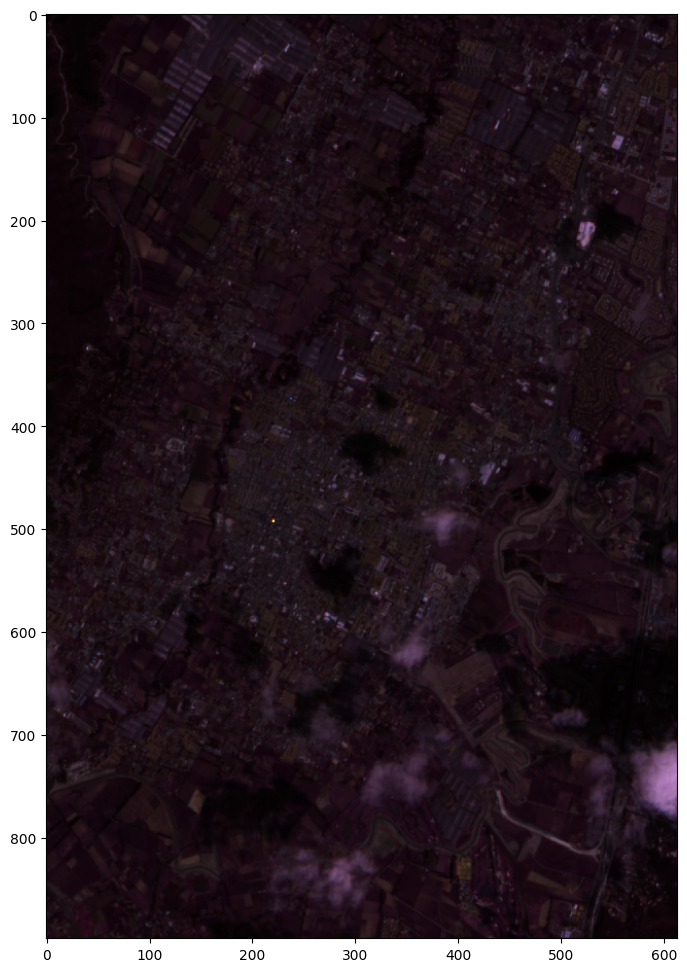

In [18]:
composicion = np.dstack((banda_rojo_norm, banda_verde_norm, banda_azul_norm))
plt.subplots(figsize = (12, 12))
plt.imshow(composicion)

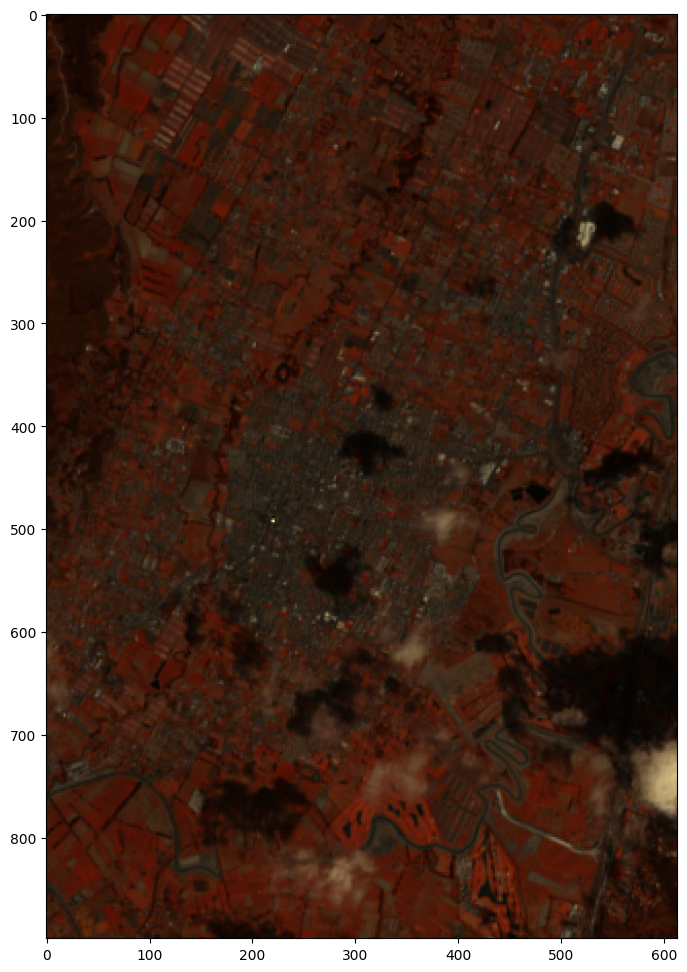

In [19]:
composicion = np.dstack((banda_infrarojo_norm, banda_rojo_norm, banda_verde_norm))
plt.subplots(figsize = (12, 12))
plt.imshow(composicion)

In [20]:
NDVI = ((banda_infrarojo_norm - banda_rojo_norm) / (banda_infrarojo_norm + banda_rojo_norm))

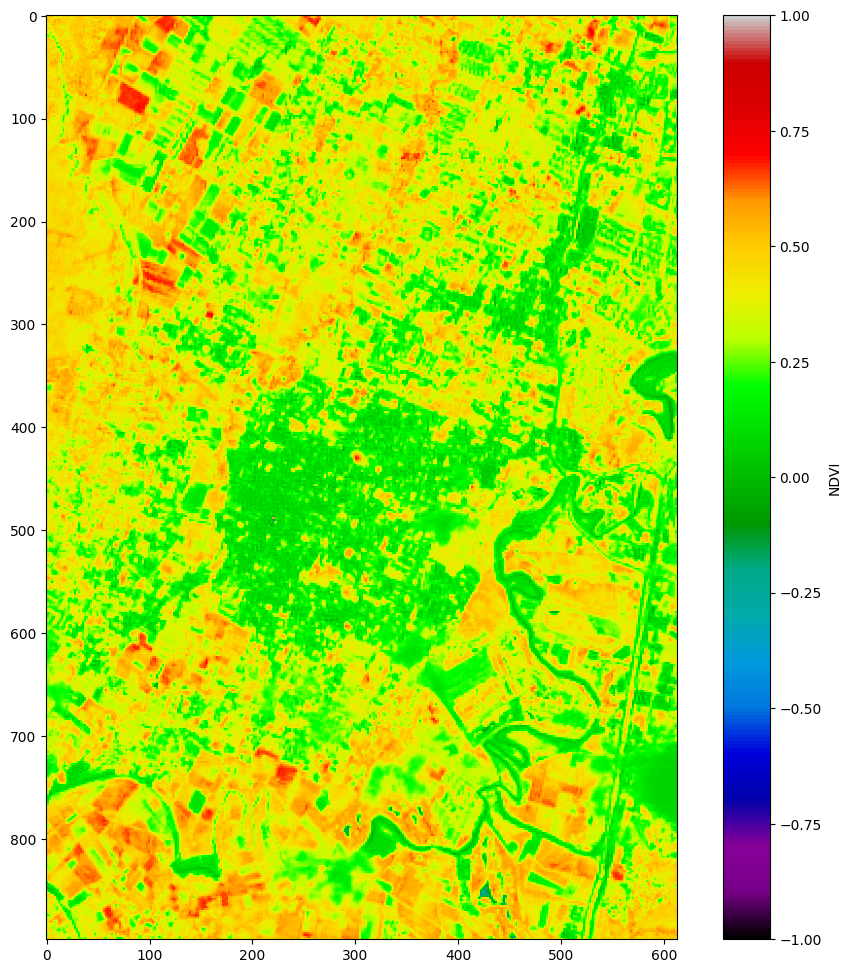

In [21]:
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI, cmap='nipy_spectral', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')

# Filtro de Suavizado (Media o Gaussiano)

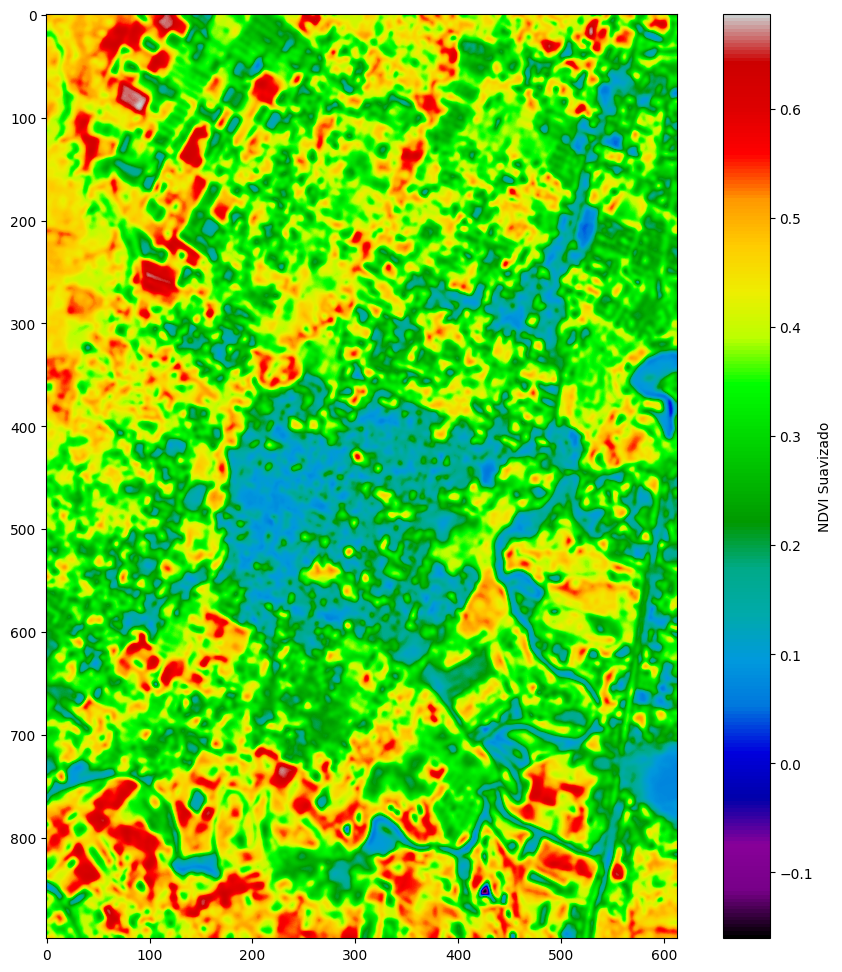

In [22]:
from scipy.ndimage import gaussian_filter

# Suavizar la banda del NDVI
NDVI_suavizado = gaussian_filter(NDVI, sigma=2)  # sigma controla el grado de suavizado
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_suavizado, cmap='nipy_spectral')
plt.colorbar(label='NDVI Suavizado')

# Filtro Laplaciano (Realce de Bordes)

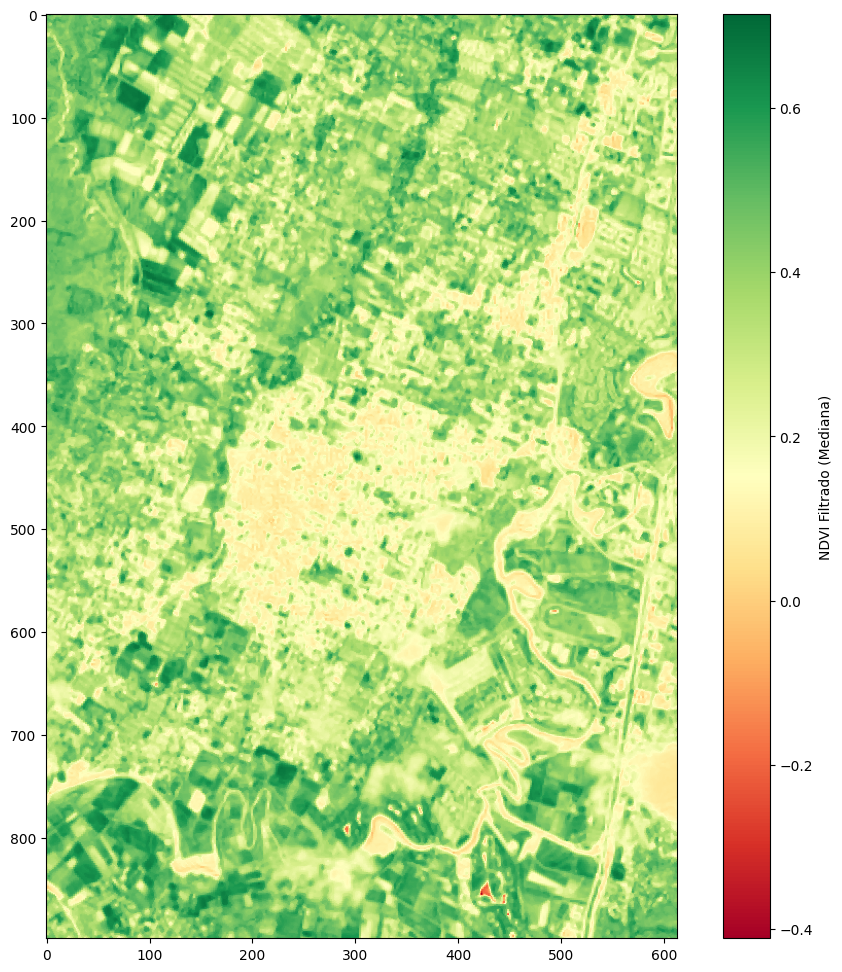

In [23]:
from scipy.ndimage import median_filter

NDVI_mediana = median_filter(NDVI, size=3)
plt.subplots(figsize = (12, 12)) # tamaño del filtro
plt.imshow(NDVI_mediana, cmap='RdYlGn')
plt.colorbar(label='NDVI Filtrado (Mediana)')

In [24]:
def load_image(file_path):
    # Cargar imagen y extraer bandas
    imagen_satelital = rasterio.open(file_path)
    bandas = {i: imagen_satelital.read(i) / imagen_satelital.read(i).max() for i in range(1, 8)}
    return bandas

def calculate_ndvi(bandas):
    # Cálculo del NDVI
    banda_infrarojo = bandas[5]  # Verifica que sea la banda correcta
    banda_rojo = bandas[4]
    NDVI = (banda_infrarojo - banda_rojo) / (banda_infrarojo + banda_rojo)
    return NDVI

def apply_filter(image, filter_type='gaussian', **kwargs):
    # Aplicar filtro basado en el tipo
    if filter_type == 'gaussian':
        return gaussian_filter(image, sigma=kwargs.get('sigma', 2))
    elif filter_type == 'median':
        return median_filter(image, size=kwargs.get('size', 3))
    elif filter_type == 'laplace':
        return laplace(image)
    else:
        raise ValueError("Filtro no reconocido")

def plot_image(image, cmap='RdYlGn', title=''):
    # Mostrar la imagen procesada
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.colorbar(label=title)
    plt.title(title)
    plt.show()

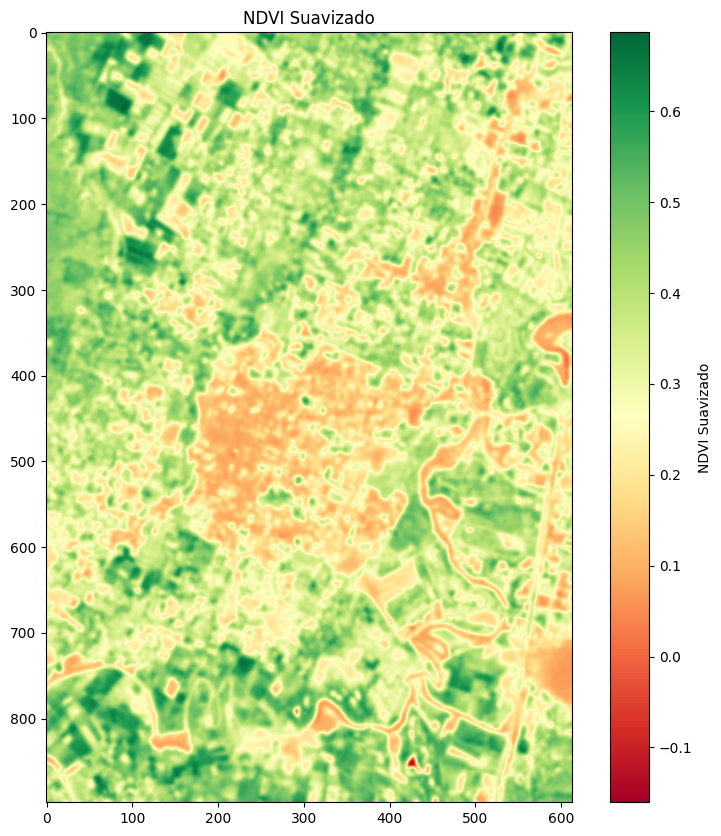

In [25]:
# 1. Cargar las bandas
file_path = "/content/drive/MyDrive/proyecto2/TIFF4/Chia_banda2020_1_14_4.tif"
bandas = load_image(file_path)

# 2. Calcular el NDVI
NDVI = calculate_ndvi(bandas)

# 3. Aplicar un filtro (por ejemplo, suavizado gaussiano)
NDVI_suavizado = apply_filter(NDVI, filter_type='gaussian', sigma=2)

# 4. Visualizar el NDVI procesado
plot_image(NDVI_suavizado, cmap='RdYlGn', title='NDVI Suavizado')


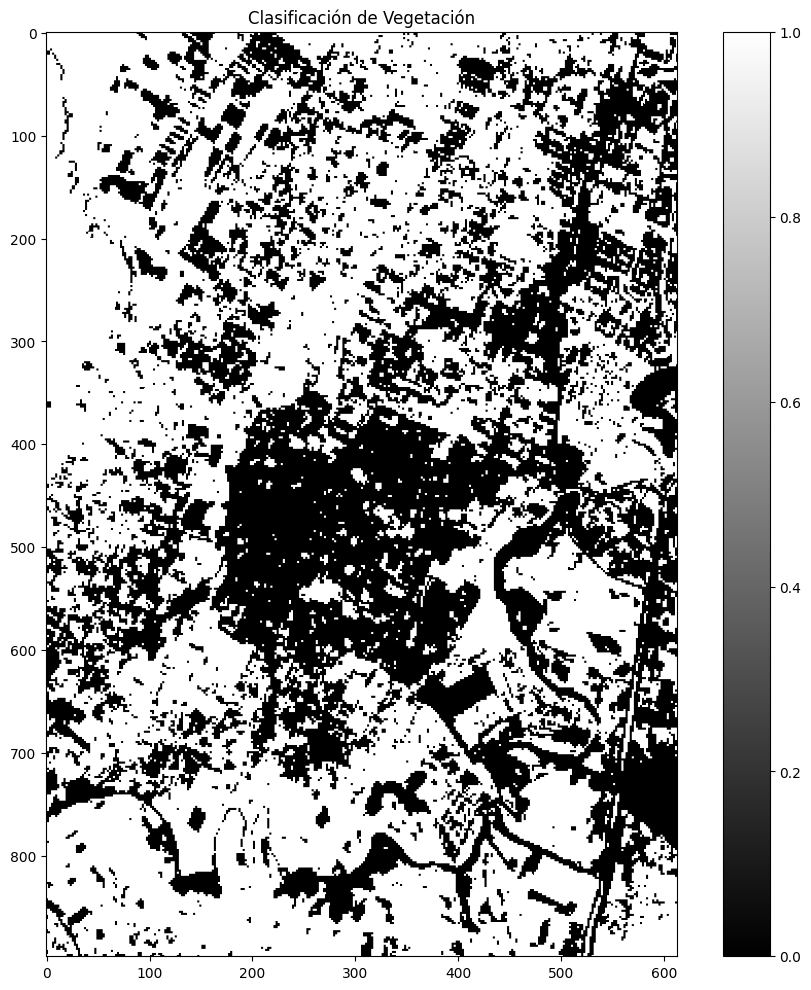

In [26]:
NDVI_clasificado = np.where(NDVI > 0.3, 1, 0)  # Umbral de 0.3
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_clasificado, cmap='gray')
plt.title("Clasificación de Vegetación")
plt.colorbar()

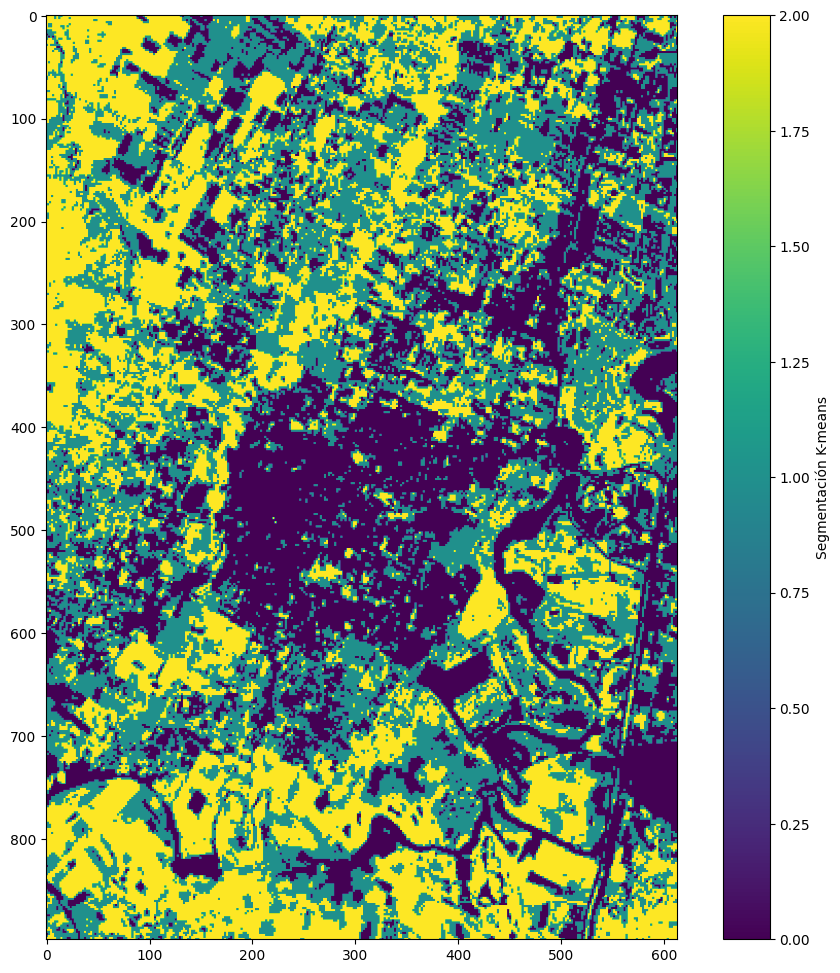

In [27]:
from sklearn.cluster import KMeans

NDVI_flat = NDVI.flatten().reshape(-1, 1)  # Aplanar
kmeans = KMeans(n_clusters=3, random_state=0).fit(NDVI_flat)
NDVI_segmentado = kmeans.labels_.reshape(NDVI.shape)
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_segmentado, cmap='viridis')
plt.colorbar(label='Segmentación K-means')


In [28]:
MNDWI = ((banda_verde_norm - banda_infrarojo_norm) / (banda_verde_norm + banda_infrarojo_norm))
MNDWI

array([[-0.81549448, -0.83480671, -0.81730286, ..., -0.47036234,
        -0.44523683, -0.38416335],
       [-0.80099843, -0.79989293, -0.83642517, ..., -0.42636343,
        -0.37021998, -0.3899561 ],
       [-0.78263933, -0.80643619, -0.79559137, ..., -0.52374701,
        -0.50477466, -0.4892851 ],
       ...,
       [-0.51709353, -0.64686776, -0.76184536, ..., -0.82640802,
        -0.80508139, -0.82990546],
       [-0.69939351, -0.79716295, -0.82371666, ..., -0.83789359,
        -0.79038083, -0.83588517],
       [-0.80214762, -0.81085353, -0.81388286, ..., -0.82070792,
        -0.78897838, -0.81953586]])

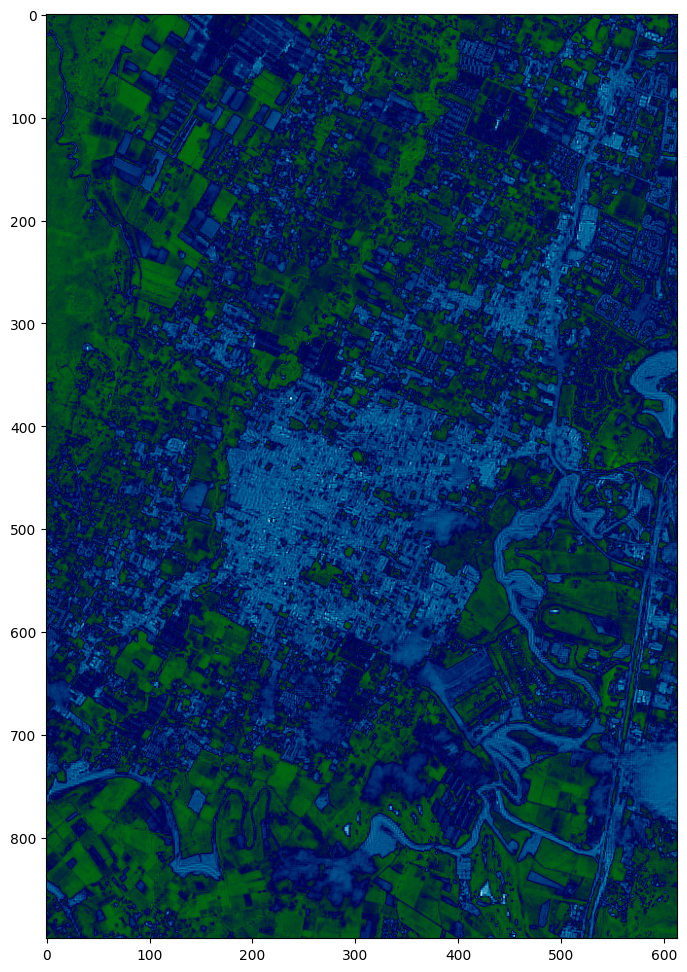

In [29]:
plt.subplots(figsize = (12, 12))
plt.imshow(MNDWI, cmap = 'ocean')

In [30]:
arcilla = banda_swir1_norm / banda_swir2_norm
arcilla

array([[1.33874485, 1.57890607, 1.421666  , ..., 1.1603886 , 1.20128157,
        1.36753458],
       [1.35888432, 1.35033115, 1.5638326 , ..., 1.17991587, 1.08615039,
        1.25921579],
       [1.24360277, 1.317173  , 1.12380157, ..., 1.49441246, 1.52372868,
        1.59766114],
       ...,
       [1.25476728, 1.17032108, 1.2238004 , ..., 1.23630048, 1.13356868,
        1.33728416],
       [1.27313163, 1.22531448, 1.24983591, ..., 1.27716992, 1.18856103,
        1.34073611],
       [1.19611359, 1.19092852, 1.27655654, ..., 1.3933858 , 1.3335111 ,
        1.26788555]])